In [2]:
import random

In [3]:
X1 = []
X2 = []
Y = []

for i in range(50):
  X1.append(random.randint(0, 100))
  X2.append(random.randint(0, 100))
  if (X1[i] > X2[i]):
    Y.append(1)
  else:
    Y.append(0)

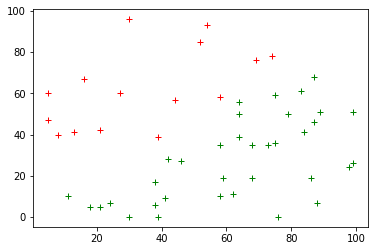

In [4]:
import matplotlib.pyplot as plt

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")

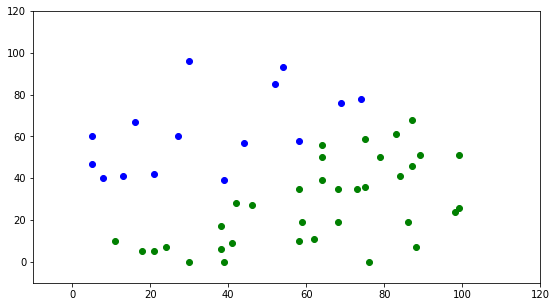

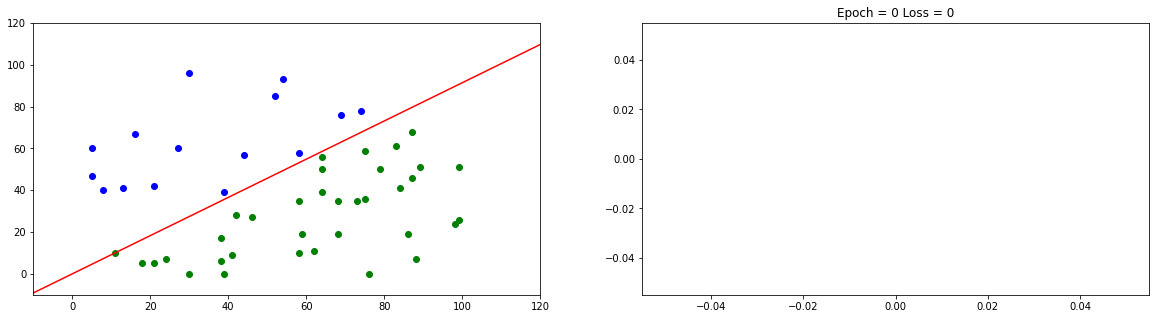

In [6]:
epoch = 0
count = 0
loss = []

while count < len(X1):
    total_err = 0
    for i in range(len(X1)):
        weighted_sum = W[0] * X1[i] + W[1] * X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error = Y[i] - pred
        if error != 0:
            count = 0
            total_err += math.sqrt(error ** 2)

            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b += lr * error
        else:
            count += 1
    
    loss.append(1/4 * total_err)

    plt.figure(figsize = (20, 5))
    display.clear_output(wait = True)
    plt.subplot(1, 2, 1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "bo")
        else:
            plt.plot(X1[i], X2[i], "go")

    plt.xlim([-10, 120])
    plt.ylim([-10, 120])
        
    xint = (theta - b) / W[0]
    yint = (theta - b) / W[1]

    slope = -yint / xint
    x = plt.xlim()
epoch = 0
count = 0
loss = []

while count < len(X1):
    total_err = 0
    for i in range(len(X1)):
        weighted_sum = W[0] * X1[i] + W[1] * X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error = Y[i] - pred
        if error != 0:
            count = 0
            total_err += math.sqrt(error ** 2)

            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b += lr * error
        else:
            count += 1
    
    loss.append(1/4 * total_err)

    plt.figure(figsize = (20, 5))
    display.clear_output(wait = True)
    plt.subplot(1, 2, 1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "bo")
        else:
            plt.plot(X1[i], X2[i], "go")

    plt.xlim([-10, 120])
    plt.ylim([-10, 120])
        
    xint = (theta - b) / W[0]
    yint = (theta - b) / W[1]

    slope = -yint / xint
    x = plt.xlim()
    # background coloring
    # plt.fill_betweenx(x1 = 1, x2 = 50, y = [1, 50], color = 'r')

    yeq = []
    for i in x:
        yeq.append(slope * i + yint)
    plt.plot(x, yeq, 'r')

    plt.subplot(1, 2, 2)
    plt.plot(loss, alpha = 0.3)
    if epoch > 10:
        avg = savgol_filter(loss, 11, 3)
        plt.plot(avg, 'r--', lw = 5)

    plt.title(f"Epoch = {epoch} Loss = {total_err}")
    plt.show()
    epoch += 1